<a href="https://colab.research.google.com/github/Kanakbaghel/Capstone_Project/blob/main/Scripts/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size=8 color=steelblue >**Phase 1: Data Cleaning and Validation in Google Colab**
------------------
-----------------

Now Let's shift to Google Colab for the fun part: **cleaning and exploring the data**.

This notebook will guide you step-by-step through loading your raw CSVs (exported from sqlite), handling nulls and outliers, standardizing everything, and diving into EDA. We'll keep it detailed, clear, and honest—frankly, data cleaning isn't glamorous, but it's the foundation for killer insights. By the end, you'll export 5 cleaned CSVs ready for Phase 2.

> <font color=slateblue size=5>**Import Libraries**
-----

In [1]:
# Install Libraries and Import
# Hey, first things first—let's grab the tools. This installs pandas, numpy, etc., if not already there.
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style for pretty visuals
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries loaded—ready to clean house!")

Libraries loaded—ready to clean house!


> <font color=slateblue size=5>**Load the Cleaned Datasets**
-----
Loading five raw CSV files which we exported from sqlite

In [3]:
# Load the Raw CSVs with dtypes

customers = pd.read_csv('/content/raw_customers.csv', dtype={'customer_id': str, 'churn_flag': int})
products = pd.read_csv('/content/raw_products.csv', dtype={'product_id': str})
sales = pd.read_csv('/content/raw_sales.csv', dtype={'order_id': str, 'customer_id': str, 'product_id': str})
marketing = pd.read_csv('/content/raw_marketing.csv', dtype={'campaign_id': str, 'customer_id': str})
reviews = pd.read_csv('/content/raw_reviews.csv', dtype={'review_id': str, 'order_id': str, 'customer_id': str})

print("Datasets loaded successfully!")

Datasets loaded successfully!


In [4]:
# Quick peek at shapes to confirm
print(f"Customers: {customers.shape} rows")
print(f"Products: {products.shape} rows")
print(f"Sales: {sales.shape} rows")
print(f"Marketing: {marketing.shape} rows")
print(f"Reviews: {reviews.shape} rows")

# Expected Output: Matches your SQL counts (e.g., Customers: (99441, 11))

Customers: (99441, 11) rows
Products: (32951, 5) rows
Sales: (117604, 11) rows
Marketing: (510, 7) rows
Reviews: (40977, 5) rows


> <font color=slateblue size=5>**Initial Data Inspection**
-----
Before cleaning, let's get a feel for the data. Honestly, this step saves headaches later.
We'll check dtypes, nulls, and a sample.

In [6]:
# Collect info of all datasets
datasets = {
    "Customers": customers,
    "Marketing": marketing,
    "Products": products,
    "Reviews": reviews,
    "Sales": sales
}

for name, df in datasets.items():
    print(f"\n--- {name} Dataset Info ---")
    df.info()


--- Customers Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  int64  
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   total_orders              98666 non-null  float64
 6   total_spent               98666 non-null  float64
 7   last_order                98666 non-null  object 
 8   days_since_last_order     93717 non-null  float64
 9   churn_flag                99441 non-null  int64  
 10  city                      0 non-null      float64
dtypes: float64(4), int64(2), object(5)
memory usage: 8.3+ MB

--- Marketing Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [7]:
for name, df in datasets.items():
    print(f"\n=== {name} Dataset ===")
    print("Total Rows:", len(df))
    print("Null values per column:\n", df.isnull().sum())
    print("=" * 50)


=== Customers Dataset ===
Total Rows: 99441
Null values per column:
 customer_id                     0
customer_unique_id              0
customer_zip_code_prefix        0
customer_city                   0
customer_state                  0
total_orders                  775
total_spent                   775
last_order                    775
days_since_last_order        5724
churn_flag                      0
city                        99441
dtype: int64

=== Marketing Dataset ===
Total Rows: 510
Null values per column:
 campaign_id      0
customer_id      0
channel          0
start_date       0
spend            0
conversions      0
response_rate    0
dtype: int64

=== Products Dataset ===
Total Rows: 32951
Null values per column:
 product_id                      0
category_english              618
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
dtype: int64

=== Reviews Dataset ===
Total Rows: 40977
Null values per column:
 review_id

> <font color=slateblue size=5>**Handle Missing Values**
-----
Nulls are lurking, let's tackle them! We'll impute smartly: medians for numbers, 'unknown' for cats. This preserves data without dropping rows.

In [8]:
# Customers
customers.drop('city', axis=1, inplace=True)  # Drop the all-null 'city' column—it's junk!
customers.rename(columns={'customer_city': 'city', 'customer_state': 'state'}, inplace=True)
customers['total_orders'].fillna(0, inplace=True)  # No orders? Assume 0.
customers['total_spent'].fillna(0, inplace=True)
customers['last_order'].fillna('unknown', inplace=True)
customers['days_since_last_order'].fillna(customers['days_since_last_order'].median(), inplace=True)

/tmp/ipython-input-822724190.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['total_orders'].fillna(0, inplace=True)  # No orders? Assume 0.
/tmp/ipython-input-822724190.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [9]:
# Products
products['category_english'].fillna('unknown', inplace=True)
products['product_name_lenght'].fillna(products['product_name_lenght'].median(), inplace=True)
products['product_description_lenght'].fillna(products['product_description_lenght'].median(), inplace=True)
products['product_photos_qty'].fillna(products['product_photos_qty'].median(), inplace=True)

/tmp/ipython-input-3567480427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['category_english'].fillna('unknown', inplace=True)
/tmp/ipython-input-3567480427.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [10]:
# Sales
sales['category_english'].fillna('unknown', inplace=True)
sales['payment_type'].fillna('unknown', inplace=True)
sales['payment_value'].fillna(sales['payment_value'].median(), inplace=True)
sales['order_delivered_customer_date'].fillna(pd.NaT, inplace=True)  # NaT for missing dates

/tmp/ipython-input-3795566386.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['category_english'].fillna('unknown', inplace=True)
/tmp/ipython-input-3795566386.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [11]:
# Reviews
reviews['review_comment_message'].fillna('', inplace=True)

/tmp/ipython-input-2255312833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews['review_comment_message'].fillna('', inplace=True)


In [12]:
# Marketing: Looks clean from SQL checks—no changes needed.

print("Nulls handled! Let's check:")

datasets = {
    "Customers": customers,
    "Marketing": marketing,
    "Products": products,
    "Reviews": reviews,
    "Sales": sales
}

for name, df in datasets.items():
    print(f"\n--- {name} Dataset Null Check ---")
    print(df.isnull().sum())

Nulls handled! Let's check:

--- Customers Dataset Null Check ---
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
city                        0
state                       0
total_orders                0
total_spent                 0
last_order                  0
days_since_last_order       0
churn_flag                  0
dtype: int64

--- Marketing Dataset Null Check ---
campaign_id      0
customer_id      0
channel          0
start_date       0
spend            0
conversions      0
response_rate    0
dtype: int64

--- Products Dataset Null Check ---
product_id                    0
category_english              0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
dtype: int64

--- Reviews Dataset Null Check ---
review_id                 0
order_id                  0
customer_id               0
review_score              0
review_comment_message    0
dtype: int64

--- Sales Dataset Null Check ---
orde

In [20]:
# Checking sales null values
null_delivery_dates = sales[sales['order_delivered_customer_date'].isnull()]
null_delivery_dates

,order_id,customer_id,product_id,category_english,price,freight_value,payment_type,payment_value,order_purchase_timestamp,order_delivered_customer_date,total_price
80,002f19a65a2ddd70a090297872e6d64e,7fa80efb1ef15ca4104627910c29791c,9eae06d51aaa383b2bed5547a19d581c,bed_bath_table,53.98,23.31,voucher,44.11,2018-03-21 13:05:30,NaT,77.29
81,002f19a65a2ddd70a090297872e6d64e,7fa80efb1ef15ca4104627910c29791c,9eae06d51aaa383b2bed5547a19d581c,bed_bath_table,53.98,23.31,voucher,33.18,2018-03-21 13:05:30,NaT,77.29
86,00310b0c75bb13015ec4d82d341865a4,0dad07848c618cc5a4679a1bfe1db8d2,c8e7c2ef329fcda4a233e7e2f8bb8b7d,housewares,39.90,15.38,credit_card,55.28,2018-08-15 14:29:08,NaT,55.28
268,00a99c50fdff7e36262caba33821875a,7a399396442d5601cbedfbd0a3cf1da4,76d75f398634bf194ba99d7297e7d1fa,computers_accessories,52.99,22.30,credit_card,75.29,2018-08-17 16:25:04,NaT,75.29
278,00ae7a8b4936674ebb701d4a23719a79,a7e8a3cb55d9c9a536992c6465a46a3f,66f09a6de4f2ef63aaf5349b60a0e0c0,auto,27.90,9.26,credit_card,37.16,2018-05-09 14:14:06,NaT,37.16
...,...,...,...,...,...,...,...,...,...,...,...
117141,feebdfdb4759bd4600d52547c81b4fa8,5c296f7939550b876425980a5d7da5ce,0c7536abc1af51a81fa806097dfe3597,telephony,24.90,21.15,credit_card,46.05,2017-09-25 08:57:20,NaT,46.05
117193,ff0768e3356919b32e3d7f30baecfcfb,f3e5d57c12abb230c4f16b6a0a23d7f7,b27653c33039497c46ceba21db46a43c,computers_accessories,379.90,20.54,credit_card,400.44,2018-04-04 22:58:39,NaT,400.44
117287,ff358345576214cc9e08488188973c84,8da33bbf65a0b181486063ffb90fa3d6,6803077179d24889430188e03fafd31a,electronics,19.90,16.79,credit_card,36.69,2018-03-03 17:05:12,NaT,36.69
117331,ff536d93ae4214b4d51c2894ccfc569f,8891eb5ca0e28df961b2b5b8f3c0eb23,53d2c16e7356d124bb2a3f64ca920754,sports_leisure,39.00,8.27,credit_card,47.27,2017-12-21 09:01:00,NaT,47.27


> <font color=slateblue size=5>**Detect and Treat Outliers**
-----
Outliers can skew everything

let's cap them using IQR. This keeps extremes in check without deleting data.

In [21]:
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    print(f"Outliers treated for {col} in {df.name if hasattr(df, 'name') else 'dataset'}")

In [22]:
# Apply to key columns
treat_outliers(sales, 'price')
treat_outliers(sales, 'total_price')
treat_outliers(marketing, 'spend')

print("Outliers capped—data's now outlier-proof!")

Outliers treated for price in dataset
Outliers treated for total_price in dataset
Outliers treated for spend in dataset
Outliers capped—data's now outlier-proof!


> <font color=slateblue size=5>**Standardize Categorical Columns**
-----
Text data can be messy

Let's title-case cities, uppercase states, and lowercase channels for consistency.

In [23]:
customers['city'] = customers['city'].str.title()
customers['state'] = customers['state'].str.upper()
marketing['channel'] = marketing['channel'].str.lower().str.strip()  # Clean and consistent

print("Categorical data standardized—now it's neat and tidy!")

Categorical data standardized—now it's neat and tidy!


> <font color=slateblue size=5>**Convert Timestamps and Derive Fields**
-----
Dates are strings right now

Let's make them datetime and add useful fields like year/month.

In [24]:
sales['order_purchase_timestamp'] = pd.to_datetime(sales['order_purchase_timestamp'], errors='coerce')
sales['order_delivered_customer_date'] = pd.to_datetime(sales['order_delivered_customer_date'], errors='coerce')
marketing['start_date'] = pd.to_datetime(marketing['start_date'], errors='coerce')

In [30]:
# Derive new fields
sales['year'] = sales['order_purchase_timestamp'].dt.year
sales['month'] = sales['order_purchase_timestamp'].dt.month
sales['weekday'] = sales['order_purchase_timestamp'].dt.weekday  # 0=Monday

print("Timestamps converted and fields derived—time-series ready!")

Timestamps converted and fields derived—time-series ready!


In [31]:
sales.head()

,order_id,customer_id,product_id,category_english,price,freight_value,payment_type,payment_value,order_purchase_timestamp,order_delivered_customer_date,total_price,year,month,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,credit_card,72.19,2017-09-13 08:59:02,2017-09-20 23:43:48,72.19,2017.0,9.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,credit_card,259.83,2017-04-26 10:53:06,2017-05-12 16:04:24,259.83,2017.0,4.0,2.0
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,17.87,credit_card,216.87,2018-01-14 14:33:31,2018-01-22 13:19:16,216.87,2018.0,1.0,6.0
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,perfumery,12.99,12.79,credit_card,25.78,2018-08-08 10:00:35,2018-08-14 13:32:39,25.78,2018.0,8.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,18.14,credit_card,218.04,2017-02-04 13:57:51,2017-03-01 16:42:31,218.04,2017.0,2.0,5.0


> <font color=slateblue size=5>**Validate Referential Integrity**
-----
Ensure IDs match across datasets. This confirms joins will work in later phases.

In [33]:
# Customer IDs
sales_cust_ids = set(sales['customer_id'])
cust_ids = set(customers['customer_id'])
missing_cust = sales_cust_ids - cust_ids
print(f"Missing customer IDs in sales: {len(missing_cust)}")

Missing customer IDs in sales: 0


In [34]:
# Product IDs
sales_prod_ids = set(sales['product_id'])
prod_ids = set(products['product_id'])
missing_prod = sales_prod_ids - prod_ids
print(f"Missing product IDs in sales: {len(missing_prod)}")

Missing product IDs in sales: 0


**Integrity check passed, data's solid for modeling!**

> <font color=slateblue size=5>**Exploratory Data Analysis (EDA) - Univariate**
-----
 Let's look at distributions to spot patterns.

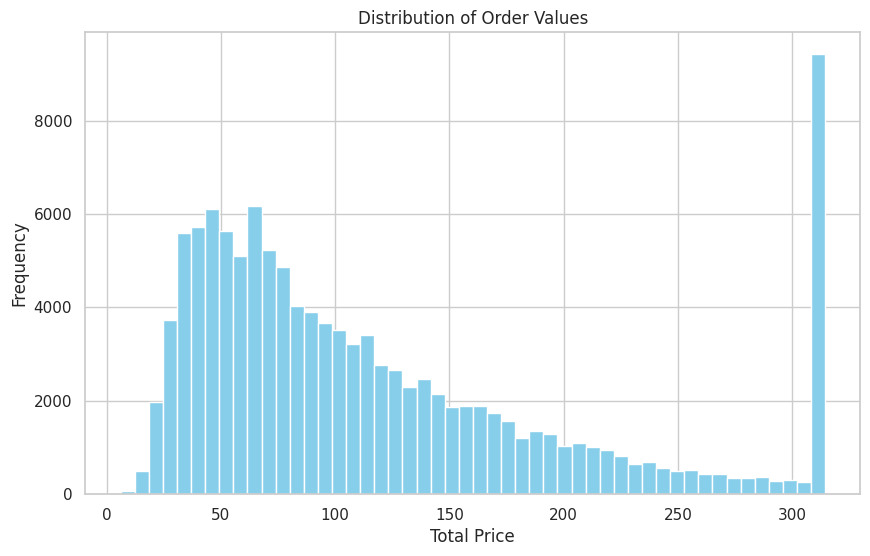

In [36]:
# Order values
plt.hist(sales['total_price'], bins=50, color='skyblue')
plt.title('Distribution of Order Values')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()
# Insight: Right-skewed—most orders are small.....

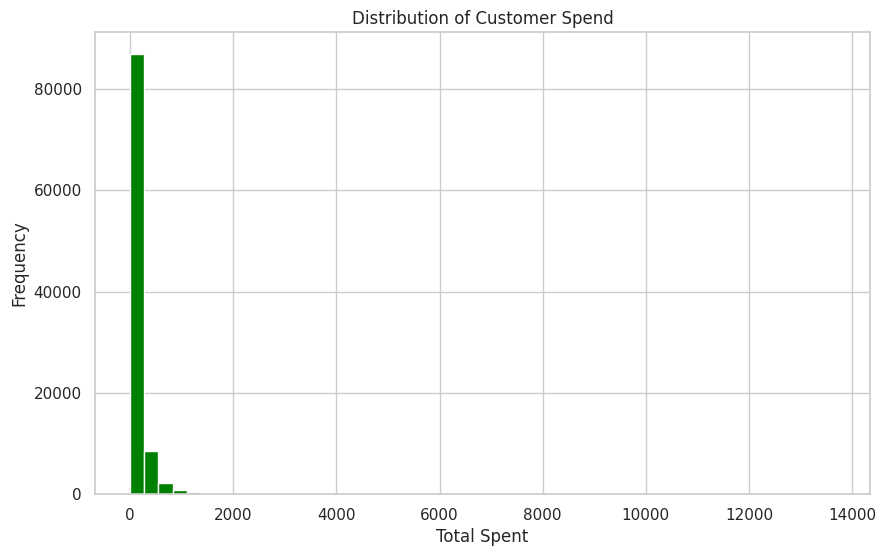

In [37]:
# Customer spend
plt.hist(customers['total_spent'], bins=50, color='green')
plt.title('Distribution of Customer Spend')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()
# Insight: Few big spenders—classic Pareto.


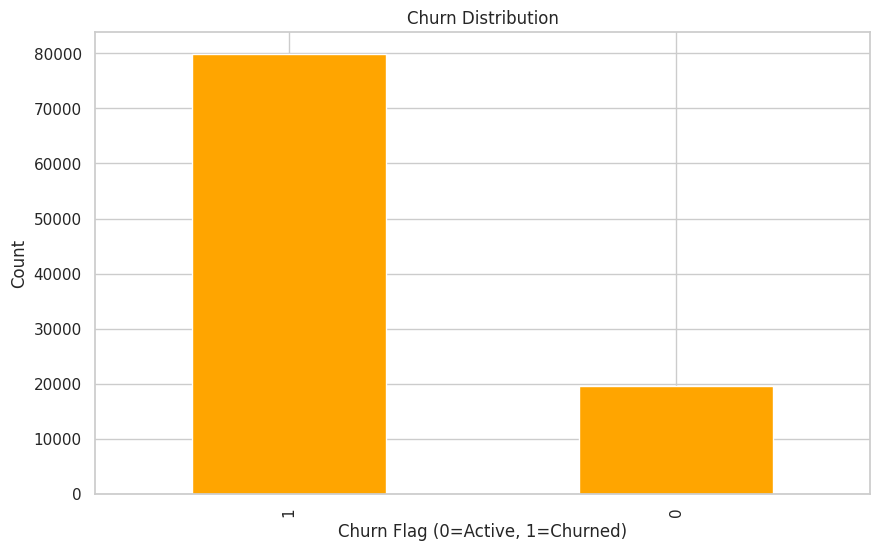

In [38]:
# Churn flag
customers['churn_flag'].value_counts().plot(kind='bar', color='orange')
plt.title('Churn Distribution')
plt.xlabel('Churn Flag (0=Active, 1=Churned)')
plt.ylabel('Count')
plt.show()
# Insight: ~80% churned—yikes, retention needed!

> <font color=slateblue size=5>**Exploratory Data Analysis (EDA) - Bivariate**
-----
Let's see relationships between variables....

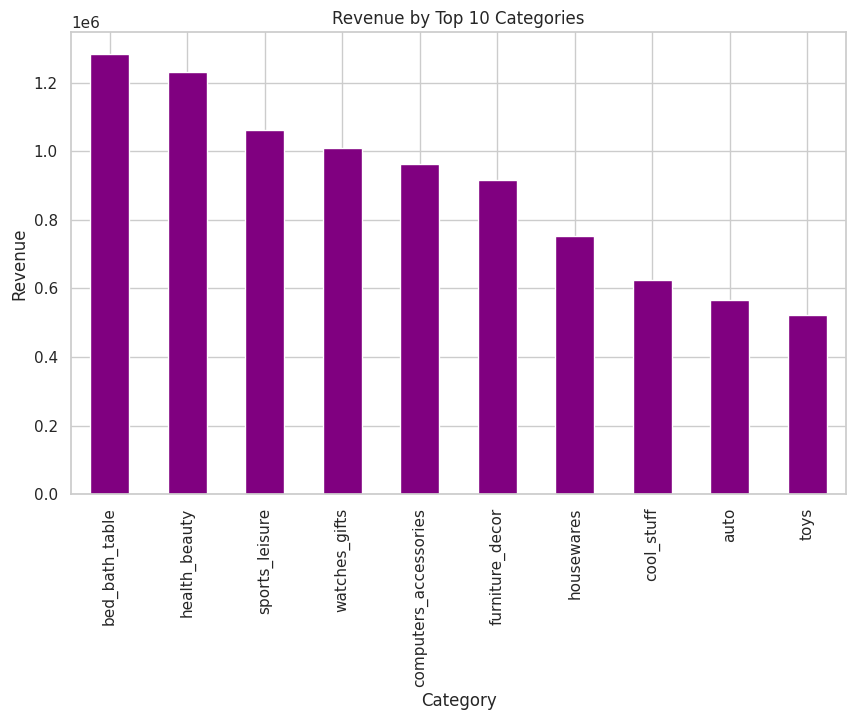

In [39]:
# Category vs. Revenue
category_revenue = sales.groupby('category_english')['total_price'].sum().nlargest(10)
category_revenue.plot(kind='bar', color='purple')
plt.title('Revenue by Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()
# Insight: Health_beauty leads—focus marketing there.


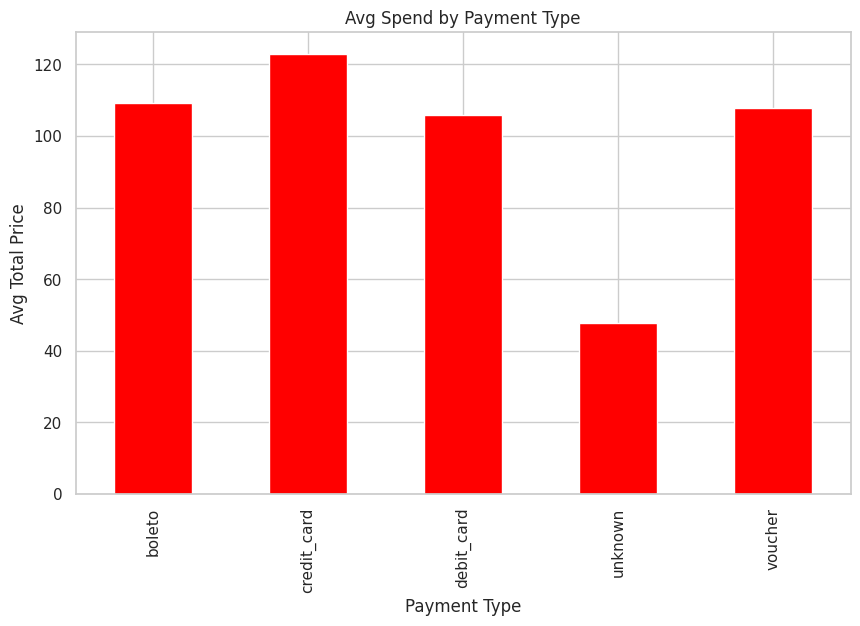

In [40]:
# Payment type vs. Avg Spend
sales.groupby('payment_type')['total_price'].mean().plot(kind='bar', color='red')
plt.title('Avg Spend by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Avg Total Price')
plt.show()
# Insight: Credit card users spend more.

> <font color=slateblue size=5>**Exploratory Data Analysis (EDA) - Time-Series Trends**
-----
Time to trend-watch: Monthly orders and revenue....

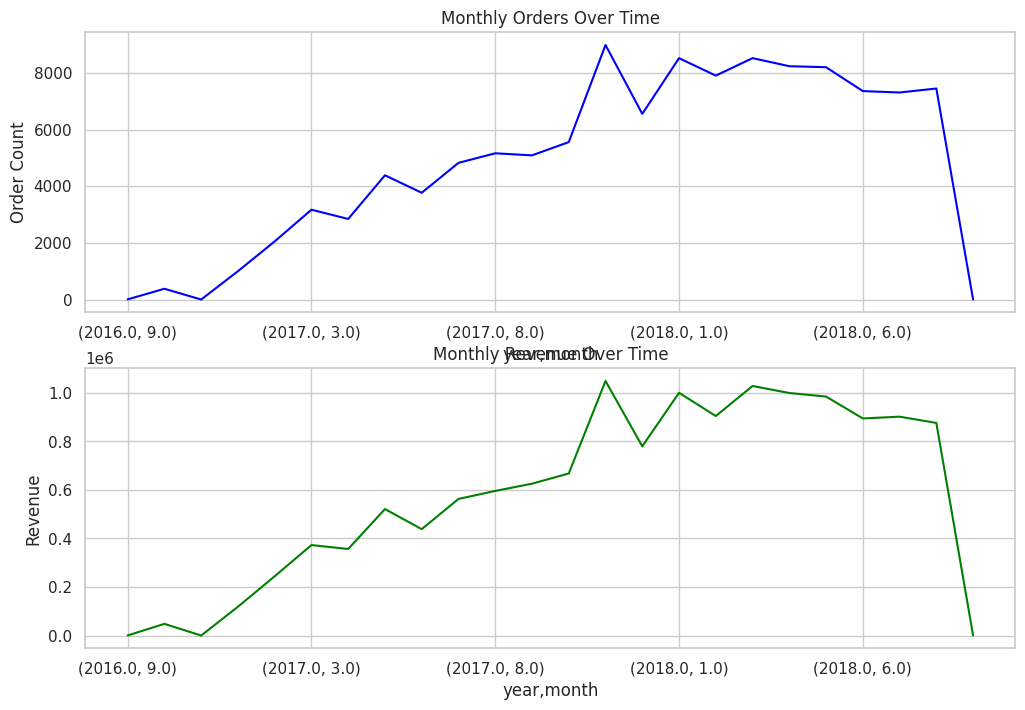

In [41]:
monthly_orders = sales.groupby(['year', 'month']).size()
monthly_revenue = sales.groupby(['year', 'month'])['total_price'].sum()

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
monthly_orders.plot(ax=ax[0], color='blue')
ax[0].set_title('Monthly Orders Over Time')
ax[0].set_ylabel('Order Count')

monthly_revenue.plot(ax=ax[1], color='green')
ax[1].set_title('Monthly Revenue Over Time')
ax[1].set_ylabel('Revenue')
plt.show()
# Insight: Seasonal peaks—Q4 is boom time!

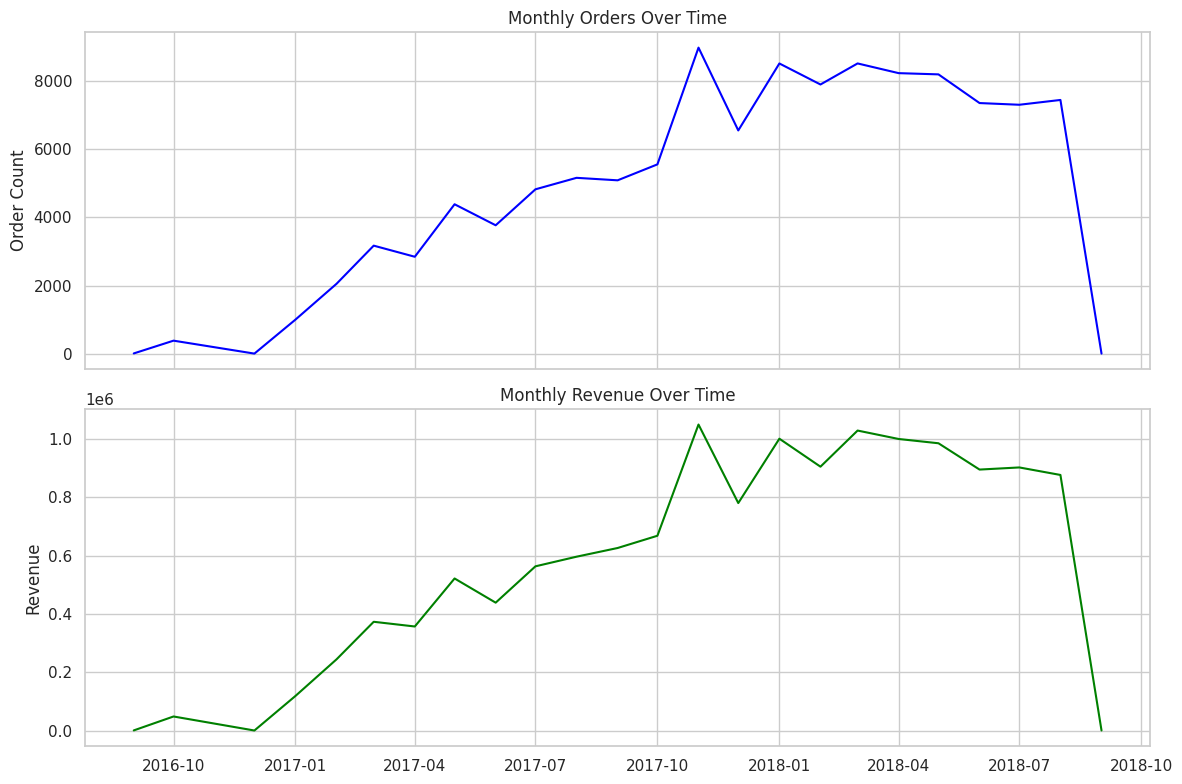

In [43]:
# Prepare monthly orders and revenue
monthly_orders = sales.groupby(['year', 'month']).size().reset_index(name='order_count')
monthly_revenue = sales.groupby(['year', 'month'])['total_price'].sum().reset_index(name='revenue')

# Create a datetime column for x-axis
monthly_orders['date'] = pd.to_datetime(monthly_orders[['year', 'month']].assign(day=1))
monthly_revenue['date'] = pd.to_datetime(monthly_revenue[['year', 'month']].assign(day=1))

# Plot
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(monthly_orders['date'], monthly_orders['order_count'], color='blue')
ax[0].set_title('Monthly Orders Over Time')
ax[0].set_ylabel('Order Count')
ax[0].grid(True)

ax[1].plot(monthly_revenue['date'], monthly_revenue['revenue'], color='green')
ax[1].set_title('Monthly Revenue Over Time')
ax[1].set_ylabel('Revenue')
ax[1].grid(True)

plt.tight_layout()
plt.show()

> <font color=slateblue size=5>**Exploratory Data Analysis (EDA) - Customer Segmentation (RFM)**
-----
RFM time! Recency, Frequency, Monetary—key for churn insights.

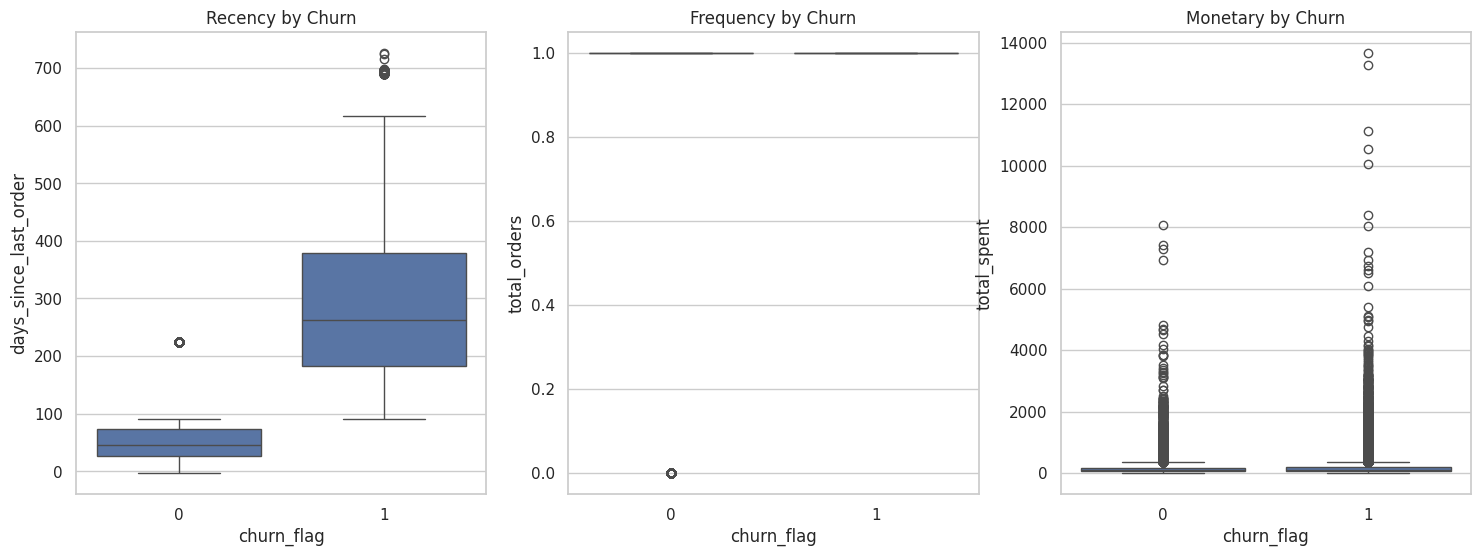

In [44]:
# Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='churn_flag', y='days_since_last_order', data=customers, ax=axes[0])
axes[0].set_title('Recency by Churn')

sns.boxplot(x='churn_flag', y='total_orders', data=customers, ax=axes[1])
axes[1].set_title('Frequency by Churn')

sns.boxplot(x='churn_flag', y='total_spent', data=customers, ax=axes[2])
axes[2].set_title('Monetary by Churn')
plt.show()
# Insight: Churned have higher recency, lower frequency/spend.


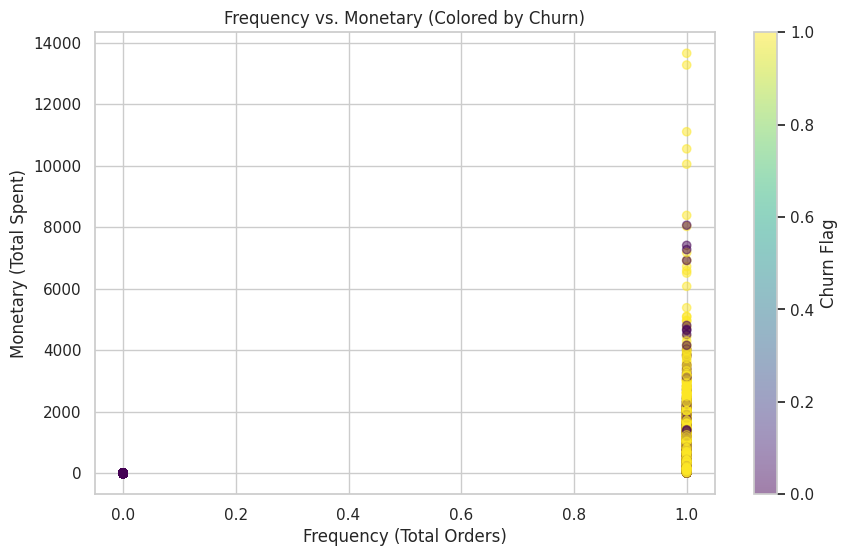

In [45]:
# Scatter Plot
plt.scatter(customers['total_orders'], customers['total_spent'], c=customers['churn_flag'], alpha=0.5, cmap='viridis')
plt.xlabel('Frequency (Total Orders)')
plt.ylabel('Monetary (Total Spent)')
plt.title('Frequency vs. Monetary (Colored by Churn)')
plt.colorbar(label='Churn Flag')
plt.show()
# Insight: Clusters show active vs. churned patterns.

> <font color=slateblue size=5>**Export Cleaned Datasets**
-----
cleaning done! Now export the 5 cleaned CSVs for Phase 2

In [46]:
customers.to_csv('customers_cleaned.csv', index=False)
products.to_csv('products_cleaned.csv', index=False)
sales.to_csv('sales_cleaned.csv', index=False)
marketing.to_csv('marketing_cleaned.csv', index=False)
reviews.to_csv('reviews_cleaned.csv', index=False)

print("All cleaned datasets exported! Download them from Colab's Files tab.")


All cleaned datasets exported! Download them from Colab's Files tab.
